### What is COVID-19?

COVID-19 is a respiratory illness caused by a new virus. Symptoms include fever, coughing, sore throat and shortness of breath. The virus can spread from person to person, but good hygiene can prevent infection.

### Related Information about COVID-19

COVID-19 may not be fatal but it spreads faster than other diseases, like common cold. Every virus has Basic Reproduction number (R0) which implies how many people will get the disease from the infected person. As per inital reseach work R0 of COVID-19 is 2.7.

Currently the goal of all scientists around the world is to "Flatten the Curve". COVID-19 currently has exponential growth rate around the world which we will be seeing in the notebook ahead. Flattening the Curve typically implies even if the number of Confirmed Cases are increasing but the distribution of those cases should be over longer timestamp. To put it in simple words if say suppose COVID-19 is going infect 100K people then those many people should be infected in 1 year but not in a month. 

The sole reason to Flatten the Curve is to reudce the load on the Medical Systems so as to increase the focus of Research to find the Medicine for the disease.

Every Pandemic has four stages:

Stage 1: Confirmed Cases come from other countries

Stage 2: Local Transmission Begins

Stage 3: Communities impacted with local transimission

Stage 4: Significant Transmission with no end in sight

Italy, USA, UK and France are the two countries which are currently in Stage 4
While India is in on the edge of Stage 3.

Other ways to tackle the disease like Corona other than Travel Ban, Cross-Border shutdown, Ban on immigrants are Testing, Contact Tracing and Quarantine.

#### Interesting YouTube Videos related to COVID-19
Gravitas: Why is the WHO Director General toeing China's line? | Coronavirus: 
https://www.youtube.com/watch?v=O1NGzmDVWxA

Gravitas: Demand grows for W.H.O Boss' resignation:
https://www.youtube.com/watch?v=J8TfKok9Rns&t=157s

Gravitas: Wuhan Coronavirus, countries that are setting an example for the world:
https://www.youtube.com/watch?v=peBNIHRtUY8&t=298s

Gravitas: Wuhan Coronavirus, Is China downplaying the number of victims?:
https://www.youtube.com/watch?v=0VEcyEhrtgI

Gravitas: UNSC fails to pin responsibility on China | Coronavirus:
https://www.youtube.com/watch?v=op43xZ1XMQY

Gravitas: Will China change its eating habits? | Wuhan Coronavirus:
https://www.youtube.com/watch?v=wjGw36K0RCU

Gravitas: Taiwan unearths China's 'Fake apology' plot | Coronavirus outbreak
https://www.youtube.com/watch?v=3kLYAiv4TkA

Leaders around the world determined to flatten the COVID-19 curve | Coronavirus | World News:
https://www.youtube.com/watch?v=licXTAyMx3c&list=WL&index=2&t=164s

### Objective of the Notebook

Objective of this notebook is to study COVID-19 outbreak with the help of some basic visualizations techniques. Comparison of China where the COVID-19 originally originated from with the Rest of the World. Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 in comming days. 

## Let's get Started

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing required Python Packages and Libraries

In [134]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from fbprophet import Prophet
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
!pip install pyramid-arima
from pyramid.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
std=StandardScaler()
#pd.set_option('display.float_format', lambda x: '%.6f' % x)

In [135]:
covid=pd.read_csv("/content/drive/My Drive/Project ML/Covid-19 visualization & forecasting/Dataset/covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.000000,0.000000,0.000000
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.000000,0.000000,0.000000
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.000000,0.000000,0.000000
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.000000,0.000000,0.000000


In [136]:
bd=covid[(covid['Country/Region']=='Bangladesh')]
bd.head(50)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
4126,4127,03/08/2020,NaN,Bangladesh,2020-03-08T10:53:02,3.000000,0.000000,0.000000
4385,4386,03/09/2020,NaN,Bangladesh,2020-03-08T10:53:02,3.000000,0.000000,0.000000
4658,4659,03/10/2020,NaN,Bangladesh,2020-03-10T06:19:32,3.000000,0.000000,0.000000
4877,4878,03/11/2020,NaN,Bangladesh,2020-03-10T06:19:32,3.000000,0.000000,0.000000
5098,5099,03/12/2020,NaN,Bangladesh,2020-03-10T06:19:32,3.000000,0.000000,0.000000
5224,5225,03/13/2020,NaN,Bangladesh,2020-03-11T20:00:00,3.000000,0.000000,0.000000
5572,5573,03/14/2020,NaN,Bangladesh,2020-03-13T22:22:02,3.000000,0.000000,0.000000
5816,5817,03/15/2020,NaN,Bangladesh,2020-03-15T18:20:18,5.000000,0.000000,0.000000
6070,6071,03/16/2020,NaN,Bangladesh,2020-03-16T14:38:45,8.000000,0.000000,2.000000
6350,6351,03/17/2020,NaN,Bangladesh,2020-03-17T12:13:16,10.000000,0.000000,3.000000


In [137]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (93058, 8)
Checking for null values:
 SNo                    0
ObservationDate        0
Province/State     29977
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Checking Data-type of each column:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [138]:
#Dropping column as SNo is of no use, and "Province/State" contains too many missing values
covid.drop(["SNo"],1,inplace=True)

In [139]:
#Converting "Observation Date" into Datetime format
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

## Datewise analysis 

In [140]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [141]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Recovered Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Death Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Basic Information
Totol number of countries with Disease Spread:  223
Total number of Confirmed Cases around the World:  23203532.0
Total number of Recovered Cases around the World:  14911319.0
Total number of Deaths Cases around the World:  804416.0
Total number of Active Cases around the World:  7487797.0
Total number of Closed Cases around the World:  15715735.0
Approximate number of Confirmed Cases per Day around the World:  108428.0
Approximate number of Recovered Cases per Day around the World:  69679.0
Approximate number of Death Cases per Day around the World:  3759.0
Approximate number of Confirmed Cases per hour around the World:  4518.0
Approximate number of Recovered Cases per hour around the World:  2903.0
Approximate number of Death Cases per hour around the World:  157.0
Number of Confirmed Cases in last 24 hours:  254298.0
Number of Recovered Cases in last 24 hours:  199067.0
Number of Death Cases in last 24 hours:  5164.0


In [142]:
fig=px.bar(x=datewise.index,y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

#### Active Cases = Number of Confirmed Cases - Number of Recovered Cases - Number of Death Cases
#### Increase in number of Active Cases is probably an indication of Recovered case or Death case number is dropping in comparison to number of Confirmed Cases drastically. Will look for the conclusive evidence for the same in the notebook ahead.

In [143]:
fig=px.bar(x=datewise.index,y=datewise["Recovered"]+datewise["Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

#### Closed Cases = Number of Recovered Cases + Number of Death Cases 
#### Increase in number of Closed classes imply either more patients are getting recovered from the disease or more pepole are dying because of COVID-19

In [144]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

fig=go.Figure()
fig.add_trace(go.Scatter(x=week_num, y=weekwise_confirmed,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_recovered,
                    mode='lines+markers',
                    name='Weekly Growth of Recovered Cases'))
fig.add_trace(go.Scatter(x=week_num, y=weekwise_deaths,
                    mode='lines+markers',
                    name='Weekly Growth of Death Cases'))
fig.update_layout(title="Weekly Growth of different types of Cases in India",
                 xaxis_title="Week Number",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Text(0.5, 1.0, 'Weekly increase in Number of Death Cases')

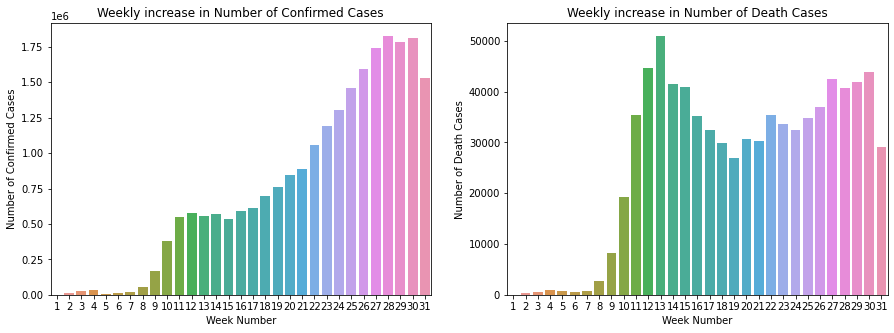

In [145]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Weekly increase in Number of Confirmed Cases")
ax2.set_title("Weekly increase in Number of Death Cases")

##### Please note the 17th week is about to end

The death toll was low in 14th week, as it was expected to rise looking at the trend of infection of death trend of previous few weeks.

15th and 16th Week showed small dip in number of Death cases, as compared to 14th Week. Showing we are somehow able to reduce the Death cases to some extent.

#### Growth rate of Confirmed, Recovered and Death Cases 

In [146]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

#### Moratality and Recovery Rate analysis around the World

In [147]:
#Calculating the Mortality Rate and Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

#Plotting Mortality and Recovery Rate 
fig = make_subplots(rows=2, cols=1,
                   subplot_titles=("Recovery Rate", "Mortatlity Rate"))
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Recovered"]/datewise["Confirmed"])*100,name="Recovery Rate"),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=datewise.index, y=(datewise["Deaths"]/datewise["Confirmed"])*100,name="Mortality Rate"),
    row=2, col=1
)
fig.update_layout(height=1000,legend=dict(x=-0.1,y=1.2,traceorder="normal"))
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_yaxes(title_text="Recovery Rate", row=1, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_yaxes(title_text="Mortality Rate", row=1, col=2)
fig.show()

Average Mortality Rate 4.674042104246265
Median Mortality Rate 4.502688002022035
Average Recovery Rate 38.30836888932305
Median Recovery Rate 40.95743088631456


#### Mortality rate = (Number of Death Cases / Number of Confirmed Cases) x 100
#### Recovery Rate= (Number of Recoverd Cases / Number of Confirmed Cases) x 100
#### Mortality rate is showing a significant dip since past few days, which is a positive sign.
#### Recovery Rate has started to pick up again which is a good sign, another supportive reason to why number of Closed Cases are increasing

In [148]:
print("Average increase in number of Confirmed Cases every day: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"].diff().fillna(0),mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"].diff().fillna(0),mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"].diff().fillna(0),mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of Cases",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

Average increase in number of Confirmed Cases every day:  108425.0
Average increase in number of Recovered Cases every day:  69679.0
Average increase in number of Deaths Cases every day:  3759.0


### Growth Factor
Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

**Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.**

A growth factor **above 1 indicates an increase correspoding cases**.

A growth factor **above 1 but trending downward** is a positive sign, whereas a **growth factor constantly above 1 is the sign of exponential growth**.

A growth factor **constant at 1 indicates there is no change in any kind of cases**.

In [149]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"]/datewise["Confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"]/datewise["Recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"]/datewise["Deaths"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

In [150]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, 
                         y=(datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])/(datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=(datewise["Recovered"]+datewise["Deaths"])/(datewise["Recovered"]+datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0,y=-0.4,traceorder="normal"))
fig.show()

#### Growth Factor constantly above 1 is an clear indication of Exponential increase in all form of cases.

### Rate of Doubling for Confirmed Cases around the World

In [151]:
c=1000
double_days=[]
C=[]
while(1):
    double_days.append(datewise[datewise["Confirmed"]<=c].iloc[[-1]]["Days Since"][0])
    C.append(c)
    c=c*2
    if(c<datewise["Confirmed"].max()):
        continue
    else:
        break

In [152]:
doubling_rate=pd.DataFrame(list(zip(C,double_days)),columns=["No. of cases","Days since first Case"])
doubling_rate["Number of days for doubling"]=doubling_rate["Days since first Case"].diff().fillna(doubling_rate["Days since first Case"])
doubling_rate

,No. of cases,Days since first Case,Number of days for doubling
0,1000,2 days,2 days
1,2000,3 days,1 days
2,4000,5 days,2 days
3,8000,7 days,2 days
4,16000,10 days,3 days
5,32000,15 days,5 days
6,64000,22 days,7 days
7,128000,49 days,27 days
8,256000,57 days,8 days
9,512000,63 days,6 days


#### Doubling Rate is fluctuating very much, which ideally supposed to increase if we are successfully faltening the curve.

### Number of days requried for increase in Confirmed Cases by 100K

In [153]:
c1=100000
days_100k=[]
C1=[]
while(1):
    days_100k.append(datewise[datewise["Confirmed"]<=c1].iloc[[-1]]["Days Since"][0])
    C1.append(c1)
    c1=c1+100000
    if(c1<datewise["Confirmed"].max()):
        continue
    else:
        break

In [154]:
rate_100k=pd.DataFrame(list(zip(C1,days_100k)),columns=["No. of Cases","Days Since first Case"])
rate_100k["Days requried for rise of 100K"]=rate_100k["Days Since first Case"].diff().fillna(rate_100k["Days Since first Case"].iloc[[0]][0])

fig=go.Figure()
fig.add_trace(go.Scatter(x=rate_100k["No. of Cases"], y=rate_100k["Days requried for rise of 100K"].dt.days,
                    mode='lines+markers',
                    name='Weekly Growth of Confirmed Cases'))
fig.update_layout(title="Number of Days required for increase in number of cases by 100K",
                 xaxis_title="Number of Cases",yaxis_title="Number of Days")
fig.show()

It's hardly taking a day or two for rise in cases by 100,000, which is pretty much a clear indication that we are still not able to "Flatten the curve"

## Countrywise Analysis

In [155]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

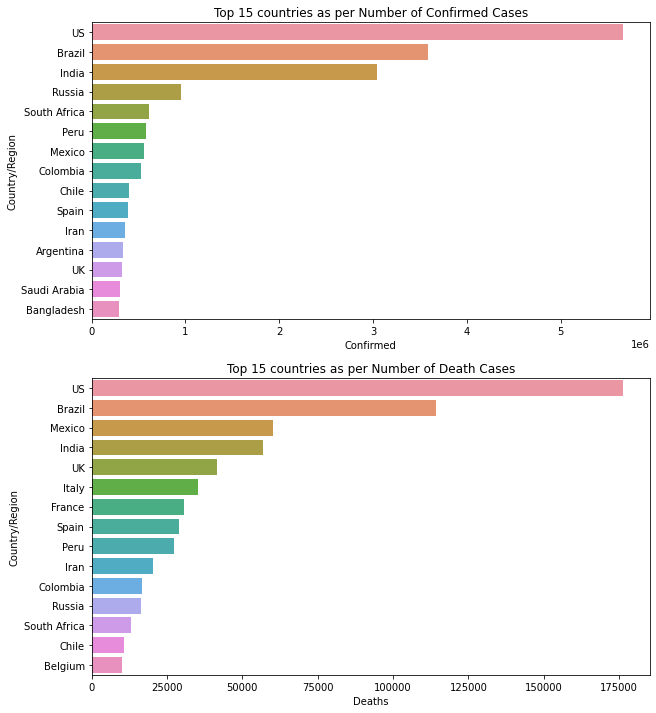

In [156]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

Tourist Data: https://worldpopulationreview.com/countries/most-visited-countries/

International Students Data: https://www.easyuni.com/advice/top-countries-with-most-international-students-1184/
#### If we check the list of countries in accordance to number tourists visiters from link mentioned above, Top countries are mainly France, Spain, USA, China, Italy, Mexico, UK, Turkey, Germany, Thailand. Another thing to take into account most of the countries mentioned above also have highest number of International Students. All of the them are the most affected countries because of COVID-19

#### Another interesting thing to see is the median age of worst affected countries.
We can check that here
*Countrywise Median Age*: https://ourworldindata.org/age-structure

#### Top 25 Countries as per Mortatlity Rate and Recovery Rate with more than 500 Confirmed Cases

Text(0.5, 0, 'Recovery (in Percentage)')

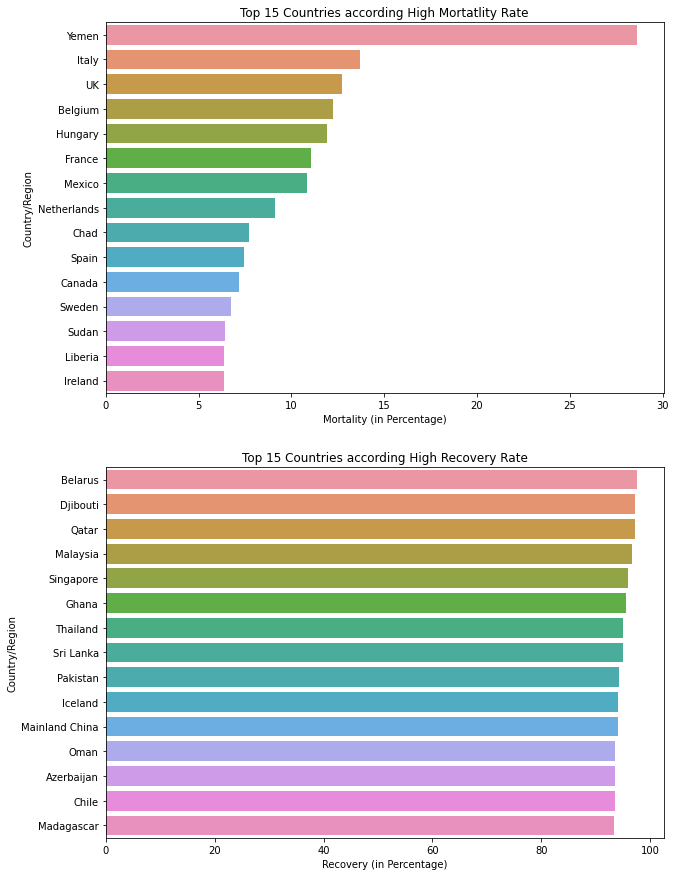

In [157]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

Text(0.5, 0, 'Recovery (in Percentage)')

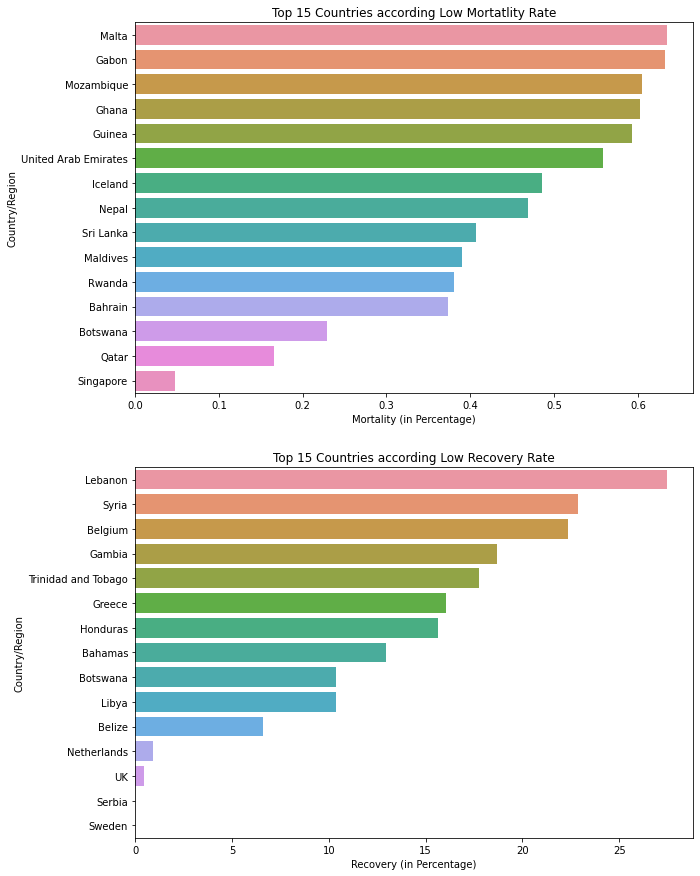

In [158]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according Low Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).tail(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according Low Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")

#### No Recovered Patients with considerable Mortality Rate

In [159]:
no_recovered_countries=countrywise[(countrywise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_countries["Mortality Rate"]=(no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100
no_recovered_countries=no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Mortality Rate"],ascending=False)
no_recovered_countries.style.background_gradient('Reds')

,Confirmed,Deaths,Mortality Rate
Country/Region,,,
MS Zaandam,9.000000,2.000000,22.222222
Sweden,86068.000000,5810.000000,6.750476
Serbia,30548.000000,695.000000,2.275108


#### Serbia was a country which had more than 50 Confirmed Cases with no Recovered patient for a very long time. Right now above countries have No Recovered Patients, but comparitively low number of Confirmed Cases

#### Countries with more than 100 Confirmed Cases and No Deaths with considerably high Recovery Rate

In [160]:
no_deaths=countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]
no_deaths=no_deaths[no_deaths["Recovery"]>0].sort_values(["Recovery"],ascending=False).drop(["Mortality"],1)
no_deaths.style.background_gradient(cmap="Reds")

,Confirmed,Recovered,Deaths,Recovery
Country/Region,,,,
Mongolia,298.000000,288.000000,0.000000,96.644295
Cambodia,273.000000,263.000000,0.000000,96.336996
Seychelles,132.000000,126.000000,0.000000,95.454545
Eritrea,306.000000,274.000000,0.000000,89.542484
Bhutan,155.000000,112.000000,0.000000,72.258065


#### Vietnam has able to contain COVID-19 pretty well with no Deaths recorded so far with pretty healthy Recovery Rate. Just for information Vietnam was the first country to inform World Health Organization about Human to Human Transmission of COVID-19. 

#### Vietnam and Cambodia will soon be free from COVID-19.

#### Cambodia has become COVID-19 free country, with No Deaths reported.

All the above countries are showing amazing recovery rate as well and will be fully completely get over COVID-19 very soon.

Gravitas: Wuhan Coronavirus: Taiwan's big claim against WHO:
https://www.youtube.com/watch?v=USTJUqe_fdk

WHO releases statement after senior staff’s awkward interview
https://www.youtube.com/watch?v=wFRHB-wP9SU&feature=youtu.be&fbclid=IwAR1_wXFXq_qG17VZhA4nivmlm8ZWjHD1W0ozYS70YjgBsmfXwRGE_l26ZVU

Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

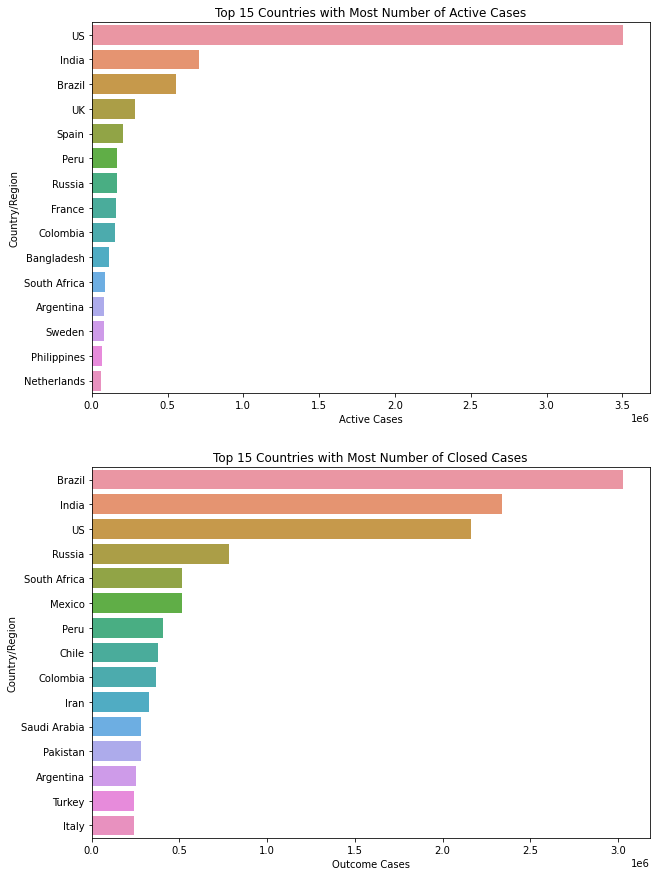

In [161]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

In [162]:
'''
country_date=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
confirm_rate=[]
for country in countrywise.index:
    days=country_date.ix[country].shape[0]
    confirm_rate.append((countrywise.ix[country]["Confirmed"])/days)
countrywise["Confirm Cases/Day"]=confirm_rate 
'''

'\ncountry_date=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":\'sum\',"Recovered":\'sum\',"Deaths":\'sum\'})\nconfirm_rate=[]\nfor country in countrywise.index:\n    days=country_date.ix[country].shape[0]\n    confirm_rate.append((countrywise.ix[country]["Confirmed"])/days)\ncountrywise["Confirm Cases/Day"]=confirm_rate \n'

In [163]:
'''
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
top_15_ccpd=countrywise.sort_values(["Confirm Cases/Day"],ascending=False).head(15)
sns.barplot(y=top_15_ccpd.index,x=top_15_ccpd["Confirm Cases/Day"],ax=ax1)
ax1.set_title("Top 15 countries as per high number Confirmed Cases per Day")
bottom_15_ccpd=countrywise[countrywise["Confirmed"]>1000].sort_values(["Confirm Cases/Day"],ascending=False).tail(15)
sns.barplot(y=bottom_15_ccpd.index,x=bottom_15_ccpd["Confirm Cases/Day"],ax=ax2)
ax2.set_title("Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases")
'''

'\nfig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))\ntop_15_ccpd=countrywise.sort_values(["Confirm Cases/Day"],ascending=False).head(15)\nsns.barplot(y=top_15_ccpd.index,x=top_15_ccpd["Confirm Cases/Day"],ax=ax1)\nax1.set_title("Top 15 countries as per high number Confirmed Cases per Day")\nbottom_15_ccpd=countrywise[countrywise["Confirmed"]>1000].sort_values(["Confirm Cases/Day"],ascending=False).tail(15)\nsns.barplot(y=bottom_15_ccpd.index,x=bottom_15_ccpd["Confirm Cases/Day"],ax=ax2)\nax2.set_title("Top 15 countries as per Lowest Confirmed Cases per Day having more than 1000 Confirmed Cases")\n'

#### Mainland China has recorded highest number of Closed cases as thier Recovery Rate is staggering recording 85%+
#### Confirmed Cases/Day is clear indication of why US has highest number of Active Cases currently. The rate is 11000+ cases per day. Showing increase in that value every day.

Mean Survival Probability across all countries 97.09352428058051
Median Survival Probability across all countries 97.94835950330435
Mean Death Probability across all countries 2.9064757194194897
Median Death Probability across all countries 2.0516404966956543


Text(0.5, 1.0, 'Bottom 15 Countries as per Survival Probability')

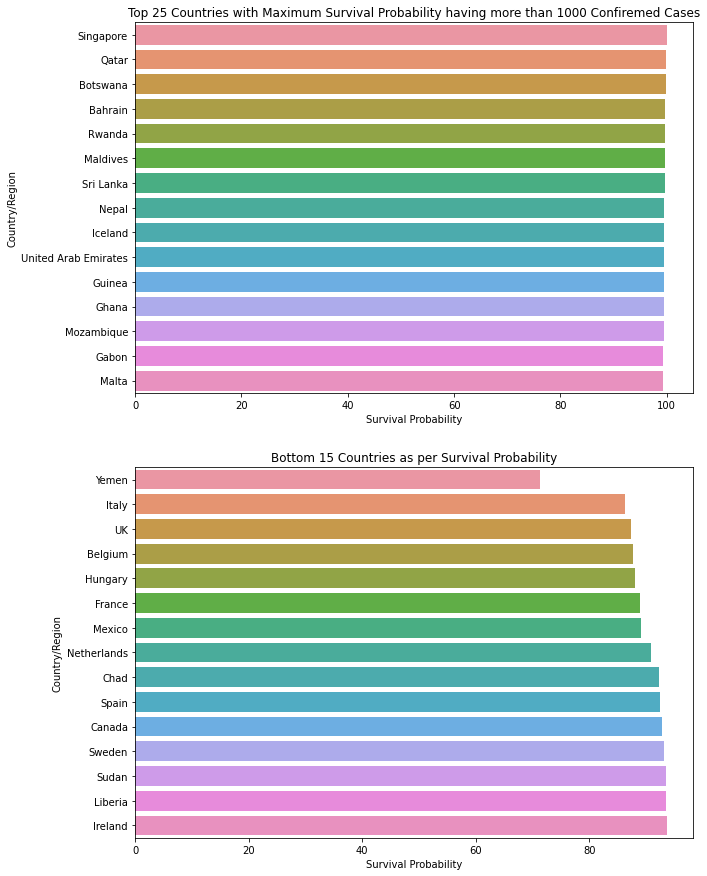

In [164]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Survival Probability"]=(1-(countrywise["Deaths"]/countrywise["Confirmed"]))*100
top_25_survival=countrywise[countrywise["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(15)
sns.barplot(x=top_25_survival["Survival Probability"],y=top_25_survival.index,ax=ax1)
ax1.set_title("Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases")
print('Mean Survival Probability across all countries',countrywise["Survival Probability"].mean())
print('Median Survival Probability across all countries',countrywise["Survival Probability"].median())
print('Mean Death Probability across all countries',100-countrywise["Survival Probability"].mean())
print('Median Death Probability across all countries',100-countrywise["Survival Probability"].median())

Bottom_5_countries=countrywise[countrywise["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(15)
sns.barplot(x=Bottom_5_countries["Survival Probability"],y=Bottom_5_countries.index,ax=ax2)
plt.title("Bottom 15 Countries as per Survival Probability")

#### Survival Probability is the only graph that looks the most promising! Having average survival probability of 95%+ across all countries but it's dropping by slight margin everyday. The difference between Mean and Death Probability is an clear indication that there few countries with really high mortality rate e.g. Italy, Algeria, UK etc.

## Journey of different Countries in COVID-19

#### When we see daily news reports on COVID-19 it's really hard to interpret what's actually happening, since the numbers are changing so rapidly but that's something expected from Exponential growth. Since almost all the pandemics tend to grow exponentially it's really hard to understand for someone from a non-mathematical or non-statistical background.

#### We are more concerned about how we are doing and where we are heading in this pandemic rather than just looking at those exponentially growing numbers. The growth won't be exponentially forever, at some point of time the curve will become flat because probably all the people on the planet are infected or we human have been able to control the disease.

#### When we are in the middle of the exponential growth it's almost impossible to tell where are we heading.
Here, I am trying to show how we can interpret the exponential growth which is the common trend among all the countries

References:
How To Tell If We're Beating COVID-19: https://www.youtube.com/watch?v=54XLXg4fYsc

Exponential growth and epidemics: https://www.youtube.com/watch?v=Kas0tIxDvrg

In [165]:
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [166]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])

In [167]:

''''
plt.figure(figsize=(15,10))
for country in countrywise.head(10).index:
    sns.lineplot(x=grouped_country.ix[country]["log_confirmed"],y=grouped_country.ix[country]["log_active"],
                 label=country,linewidth=3)
plt.xlabel("Confirmed Cases (Logrithmic Scale)")
plt.ylabel("Active Cases (Logarithmic Scale)")
plt.title("COVID-19 Journey of Top 10 countries having Highest number of Confirmed Cases")

'''

'\'\nplt.figure(figsize=(15,10))\nfor country in countrywise.head(10).index:\n    sns.lineplot(x=grouped_country.ix[country]["log_confirmed"],y=grouped_country.ix[country]["log_active"],\n                 label=country,linewidth=3)\nplt.xlabel("Confirmed Cases (Logrithmic Scale)")\nplt.ylabel("Active Cases (Logarithmic Scale)")\nplt.title("COVID-19 Journey of Top 10 countries having Highest number of Confirmed Cases")\n\n'

It's pretty evident that the disease is spreading in same manner everywhere, but if particular country is following pandemic controlling practices rigrously the results are evident in the graph.

Most of the countries will follow the same trajectory as that USA, which is **"Uncontrolled Exponential Growth"** 

Classic example is China where the graph shows the sharp dip, which is an evidence that they are able to get control over the COVID-19

Germany and Iran are seems to be heading towards that dip, showing the pandemic control practices are woking in favour.

## Clustering of Countries

In [168]:
X=countrywise[["Confirmed","Deaths","Recovered"]]
X=std.fit_transform(X)

In [169]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Silhouette Score Method')

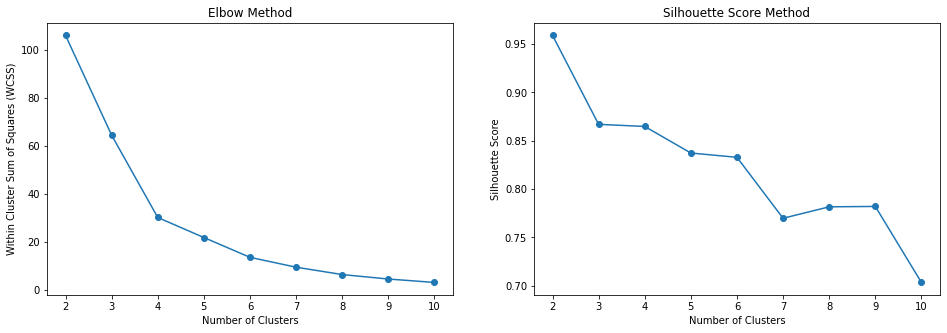

In [170]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")

x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

Let's consider K=5

In [171]:
clf_final=KMeans(n_clusters=5,init='k-means++',random_state=42)
clf_final.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [172]:
countrywise["Clusters"]=clf_final.predict(X)

#### Summary of Clusters

In [173]:
cluster_summary=pd.concat([countrywise[countrywise["Clusters"]==1],countrywise[countrywise["Clusters"]==2],countrywise[countrywise["Clusters"]==3],countrywise[countrywise["Clusters"]==4],countrywise[countrywise["Clusters"]==0].head(100)])
cluster_summary.style.background_gradient(cmap='Reds')

,Confirmed,Recovered,Deaths,Mortality,Recovery,Active Cases,Outcome Cases,Survival Probability,Clusters
Country/Region,,,,,,,,,
Brazil,3582362.000000,2913966.000000,114250.000000,3.189237,81.342031,554146.000000,3028216.000000,96.810763,1
India,3044940.000000,2280566.000000,56706.000000,1.862303,74.896911,707668.000000,2337272.000000,98.137697,1
Russia,949531.000000,765754.000000,16268.000000,1.713267,80.645498,167509.000000,782022.000000,98.286733,2
South Africa,607045.000000,504127.000000,12987.000000,2.139380,83.046067,89931.000000,517114.000000,97.860620,2
Colombia,522138.000000,348940.000000,16568.000000,3.173107,66.829076,156630.000000,365508.000000,96.826893,2
Chile,395708.000000,369730.000000,10792.000000,2.727264,93.435058,15186.000000,380522.000000,97.272736,2
Iran,356792.000000,307702.000000,20502.000000,5.746205,86.241283,28588.000000,328204.000000,94.253795,2
Argentina,336802.000000,245781.000000,6848.000000,2.033242,72.974923,84173.000000,252629.000000,97.966758,2
Saudi Arabia,306370.000000,278441.000000,3619.000000,1.181251,90.883899,24310.000000,282060.000000,98.818749,2


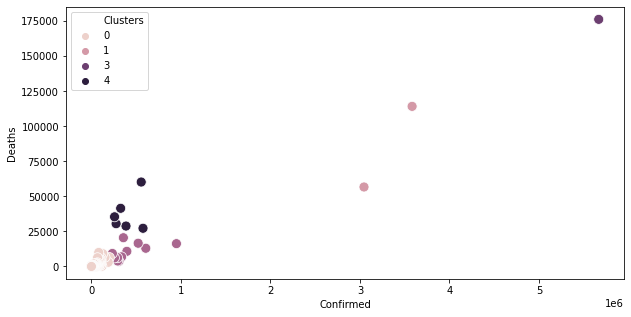

In [174]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=countrywise["Confirmed"],y=countrywise["Deaths"],hue=countrywise["Clusters"],s=100)

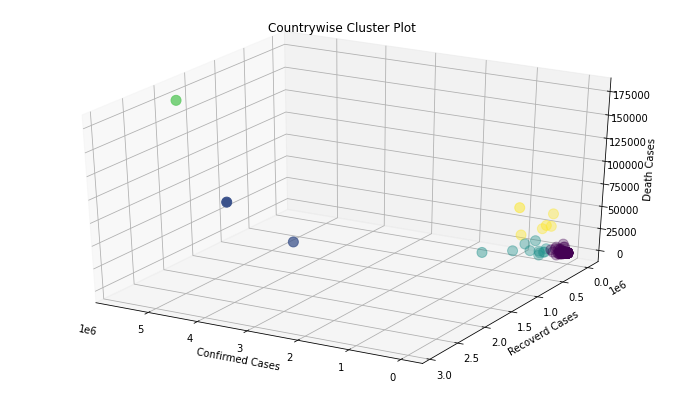

In [175]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(countrywise["Confirmed"],countrywise["Recovered"],countrywise["Deaths"], c=countrywise["Clusters"],
           marker='o',s=100)
ax.view_init(azim=120)
ax.set_xlabel('Confirmed Cases')
ax.set_ylabel('Recoverd Cases')
ax.set_zlabel('Death Cases')
plt.title("Countrywise Cluster Plot")
plt.show()

Cluster 0 is a set of countries which are very less affected, with comapritively low number of Confimed, Recoverd and Death Cases. e.g. India, Canada etc.

Cluster 1 is set of countries which are severly affected, with really high number of Confirmed, Recovered and Death Cases. e.g. United States is the only country which belongs to this Cluster.

Cluster 3 belongs to countries which are worst affected with high number of Confirmed Cases but having really good number of Recoverd Cases, with comparitively low Mortality Rate. e.g. Germany, Russia, Iran, Brazil etc.

Cluster 2 belongs to countries which are badly affected with high number of Confirmed Cases but having really good number of Recoverd Cases, but high Mortality Rate e.g. Italy, Spain etc.

Cluster 4 is somehow similar to Cluster 2, but high Mortality Rate compared to Cluster 2 also the number of Active Cases are high as compared to Cluster 2 e.g. United Kingdom, France etc.

### Comparison of China, Italy, US, Spain and Rest of the World

In [176]:
china_data=covid[covid["Country/Region"]=="Mainland China"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
US_data=covid[covid["Country/Region"]=="US"]
spain_data=covid[covid["Country/Region"]=="Spain"]
rest_of_world=covid[(covid["Country/Region"]!="Mainland China")&(covid["Country/Region"]!="Italy")&(covid["Country/Region"]!="US")&(covid["Country/Region"]!="Spain")]

datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

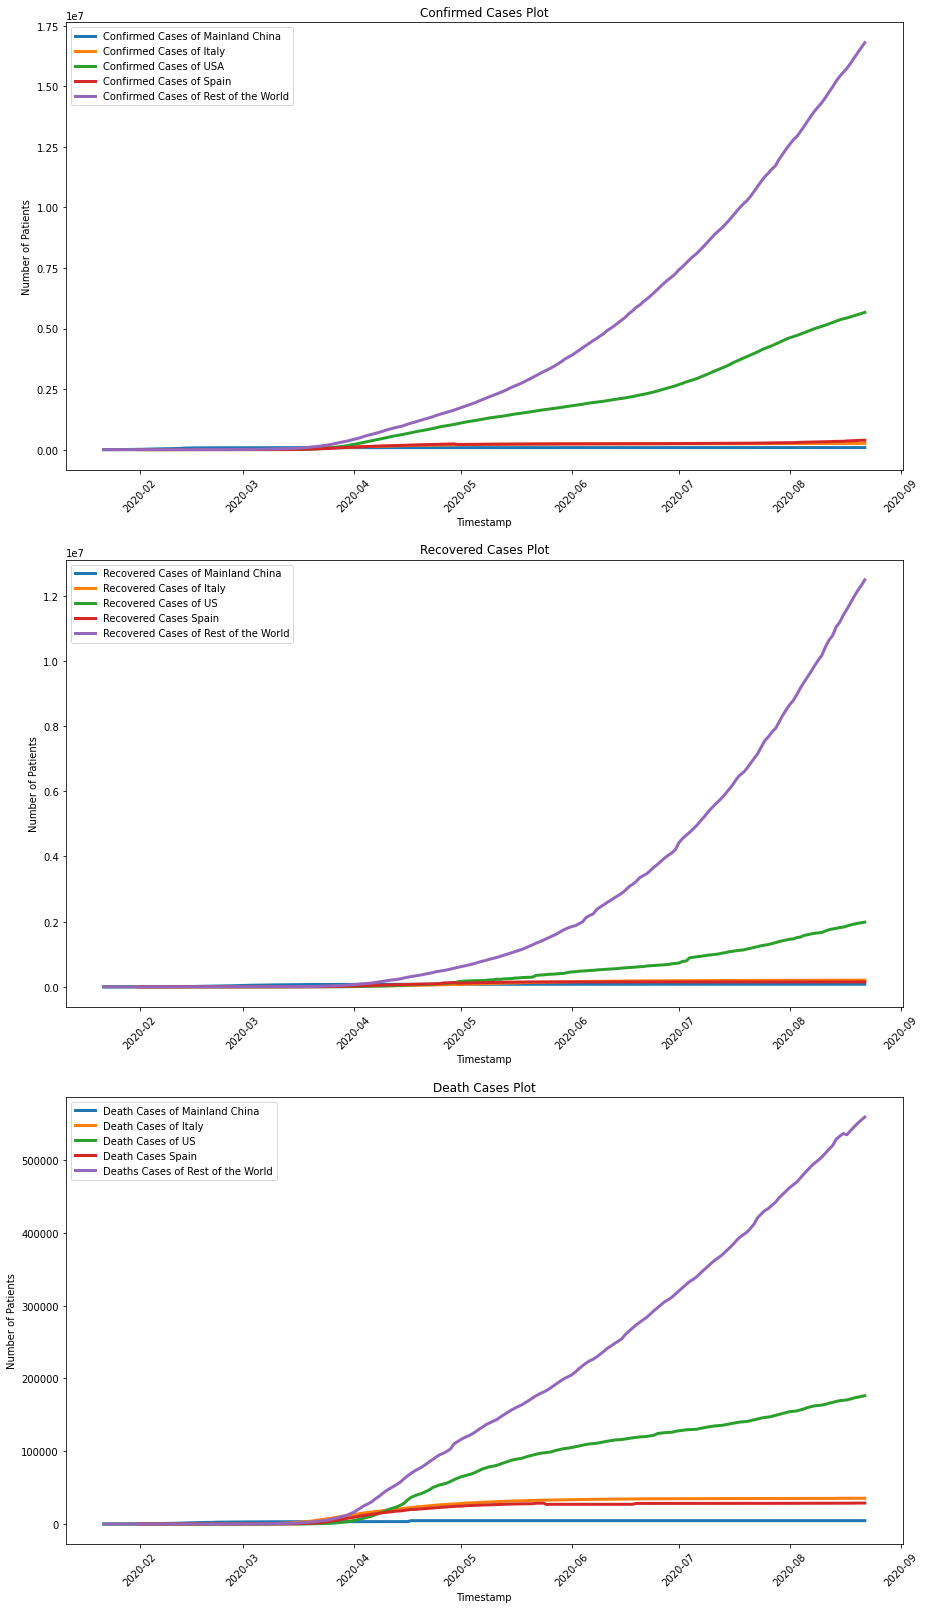

In [177]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,28))
ax1.plot(datewise_china["Confirmed"],label="Confirmed Cases of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Confirmed"],label="Confirmed Cases of Italy",linewidth=3)
ax1.plot(datewise_US["Confirmed"],label="Confirmed Cases of USA",linewidth=3)
ax1.plot(datewise_Spain["Confirmed"],label="Confirmed Cases of Spain",linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"],label="Confirmed Cases of Rest of the World",linewidth=3)
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax2.plot(datewise_china["Recovered"],label="Recovered Cases of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovered"],label="Recovered Cases of Italy",linewidth=3)
ax2.plot(datewise_US["Recovered"],label="Recovered Cases of US",linewidth=3)
ax2.plot(datewise_Spain["Recovered"],label="Recovered Cases Spain",linewidth=3)
ax2.plot(datewise_restofworld["Recovered"],label="Recovered Cases of Rest of the World",linewidth=3)
ax2.set_title("Recovered Cases Plot")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(45)
ax3.plot(datewise_china["Deaths"],label='Death Cases of Mainland China',linewidth=3)
ax3.plot(datewise_Italy["Deaths"],label='Death Cases of Italy',linewidth=3)
ax3.plot(datewise_US["Deaths"],label='Death Cases of US',linewidth=3)
ax3.plot(datewise_Spain["Deaths"],label='Death Cases Spain',linewidth=3)
ax3.plot(datewise_restofworld["Deaths"],label="Deaths Cases of Rest of the World",linewidth=3)
ax3.set_title("Death Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(45)

#### China has been able to "flatten the curve" looking at their graphs of Confirmed and Death Cases. With staggering Recovery Rate.
#### US seems to have good control on Deaths, but number of people getting affected is going way out of hand.

In [178]:
datewise_china["Mortality"]=(datewise_china["Deaths"]/datewise_china["Confirmed"])*100
datewise_Italy["Mortality"]=(datewise_Italy["Deaths"]/datewise_Italy["Confirmed"])*100
datewise_US["Mortality"]=(datewise_US["Deaths"]/datewise_US["Confirmed"])*100
datewise_Spain["Mortality"]=(datewise_Spain["Deaths"]/datewise_Spain["Confirmed"])*100
datewise_restofworld["Mortality"]=(datewise_restofworld["Deaths"]/datewise_restofworld["Confirmed"])*100

datewise_china["Recovery"]=(datewise_china["Recovered"]/datewise_china["Confirmed"])*100
datewise_Italy["Recovery"]=(datewise_Italy["Recovered"]/datewise_Italy["Confirmed"])*100
datewise_US["Recovery"]=(datewise_US["Recovered"]/datewise_US["Confirmed"])*100
datewise_Spain["Recovery"]=(datewise_Spain["Recovered"]/datewise_Spain["Confirmed"])*100
datewise_restofworld["Recovery"]=(datewise_restofworld["Recovered"]/datewise_restofworld["Confirmed"])*100

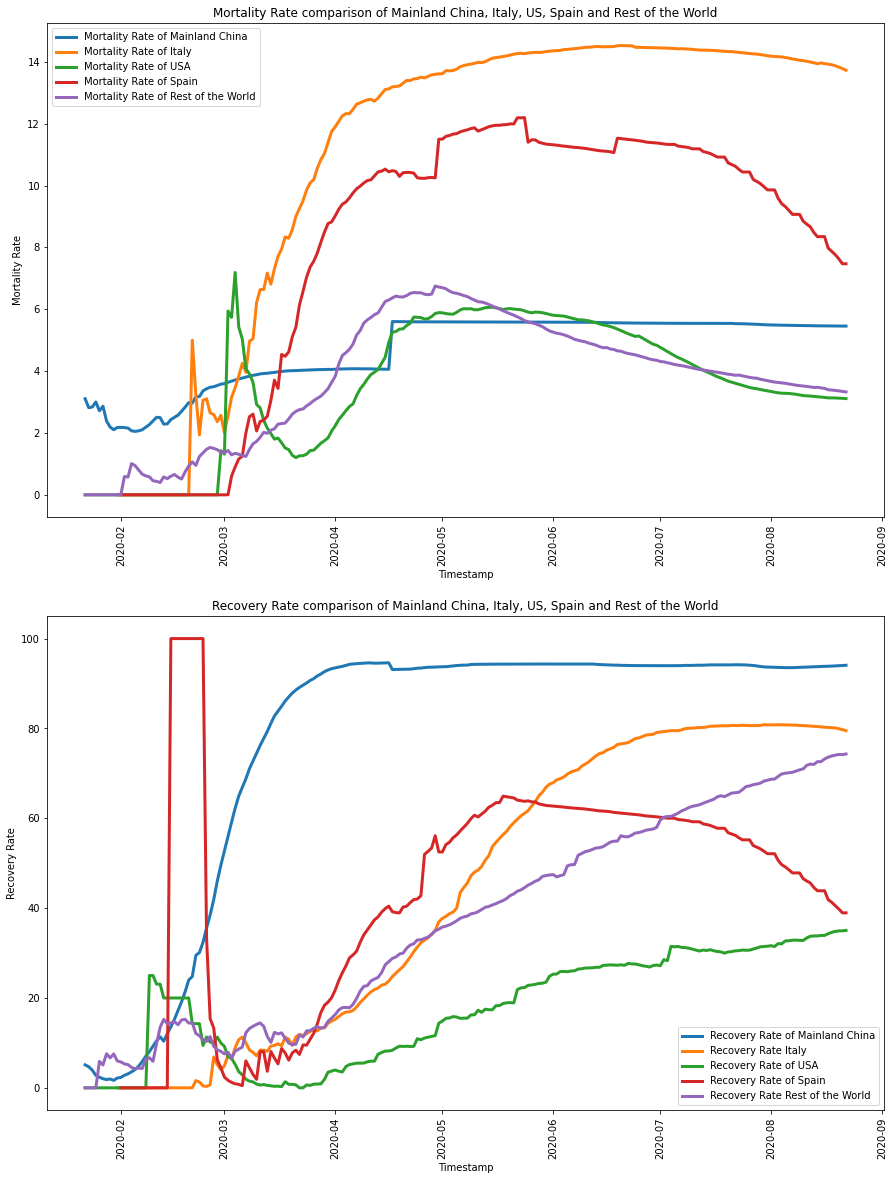

In [179]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,20))
ax1.plot(datewise_china["Mortality"],label="Mortality Rate of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Mortality"],label="Mortality Rate of Italy",linewidth=3)
ax1.plot(datewise_US["Mortality"],label="Mortality Rate of USA",linewidth=3)
ax1.plot(datewise_Spain["Mortality"],label="Mortality Rate of Spain",linewidth=3)
ax1.plot(datewise_restofworld["Mortality"],label="Mortality Rate of Rest of the World",linewidth=3)
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Mortality Rate comparison of Mainland China, Italy, US, Spain and Rest of the World")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Recovery"],label="Recovery Rate of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovery"],label="Recovery Rate Italy",linewidth=3)
ax2.plot(datewise_US["Recovery"],label="Recovery Rate of USA",linewidth=3)
ax2.plot(datewise_Spain["Recovery"],label="Recovery Rate of Spain",linewidth=3)
ax2.plot(datewise_restofworld["Recovery"],label="Recovery Rate Rest of the World",linewidth=3)
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Recovery Rate comparison of Mainland China, Italy, US, Spain and Rest of the World")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

#### Taking off Recovery Rate of Spain is a good sign but it's nowhere in comparison to the Moratality Rate. Its alarming sign for USA as Recovery Rate is dropping down with Mortality Rate taking off 

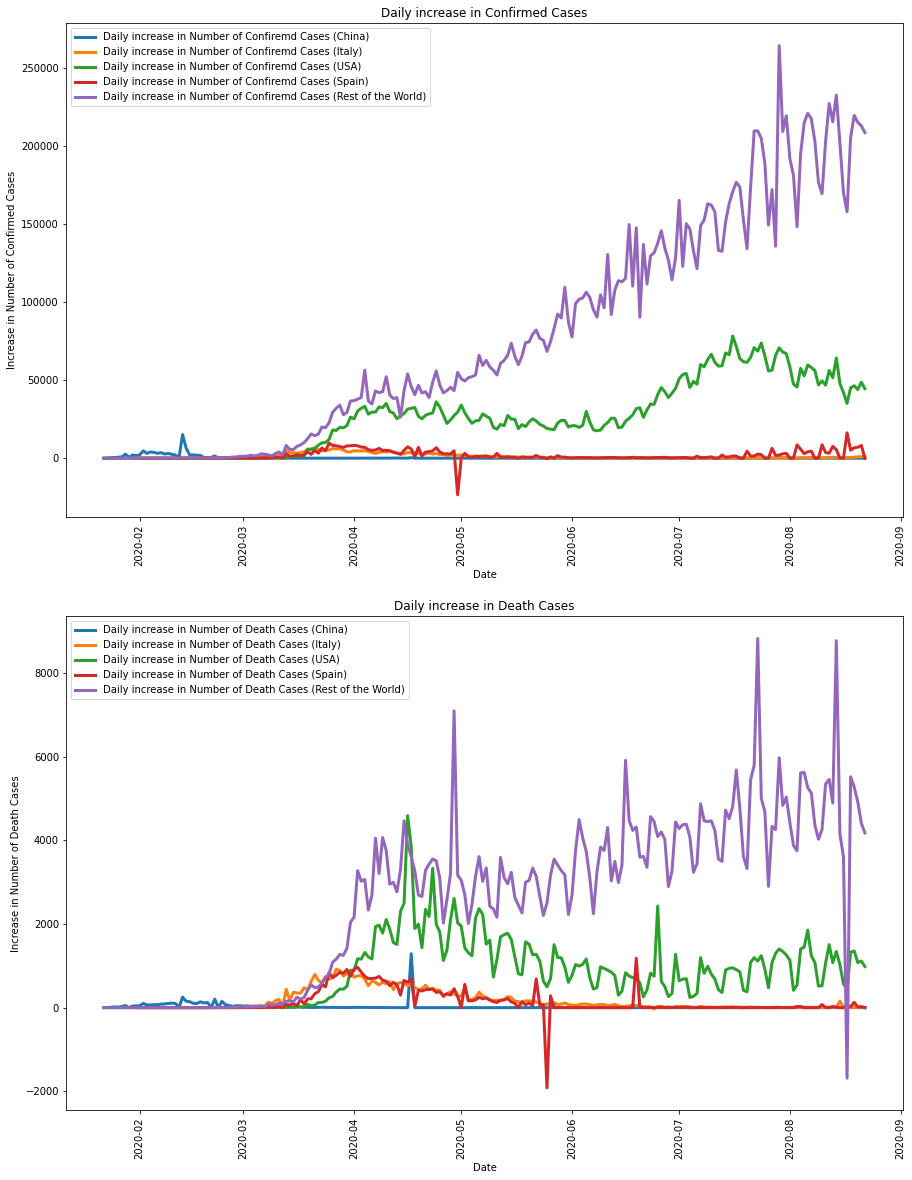

In [180]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,20))
ax1.plot(datewise_china["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (China)',linewidth=3)
ax1.plot(datewise_Italy["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Italy)',linewidth=3)
ax1.plot(datewise_US["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (USA)',linewidth=3)
ax1.plot(datewise_Spain["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Spain)',linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Rest of the World)',linewidth=3)
ax1.set_xlabel('Date')
ax1.set_ylabel("Increase in Number of Confirmed Cases")
ax1.set_title("Daily increase in Confirmed Cases")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (China)',linewidth=3)
ax2.plot(datewise_Italy["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Italy)',linewidth=3)
ax2.plot(datewise_US["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (USA)',linewidth=3)
ax2.plot(datewise_Spain["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Spain)',linewidth=3)
ax2.plot(datewise_restofworld["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Rest of the World)',linewidth=3)
ax2.set_xlabel('Date')
ax2.set_ylabel("Increase in Number of Death Cases")
ax2.set_title("Daily increase in Death Cases")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

#### We can clearly notice the decreasing trend in the number of Daily Confirmed and Death Cases of Spain and Italy. That's really positive sign for both the countries. 

# Data Analysis for Bangladesh 

In [181]:
india_data=covid[covid["Country/Region"]=="Bangladesh"]
datewise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.iloc[-1])
print("Total Active Cases: ",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed   292625.000000
Recovered   175567.000000
Deaths        3907.000000
Name: 2020-08-22 00:00:00, dtype: float64
Total Active Cases:  113151.0
Total Closed Cases:  179474.0


In [182]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Deaths"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in Bangladesh",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [183]:
fig=px.bar(x=datewise_india.index,y=datewise_india["Confirmed"]-datewise_india["Recovered"]-datewise_india["Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases in India",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

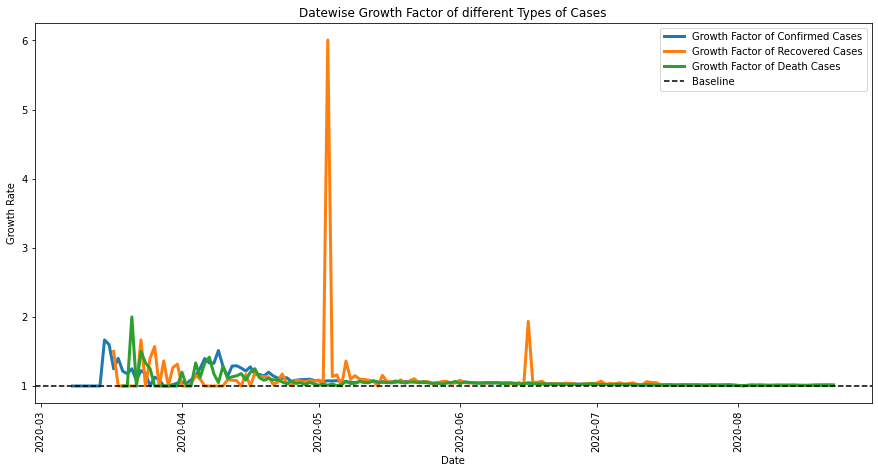

In [184]:
india_increase_confirm=[]
india_increase_recover=[]
india_increase_deaths=[]
for i in range(datewise_india.shape[0]-1):
    india_increase_confirm.append(((datewise_india["Confirmed"].iloc[i+1])/datewise_india["Confirmed"].iloc[i]))
    india_increase_recover.append(((datewise_india["Recovered"].iloc[i+1])/datewise_india["Recovered"].iloc[i]))
    india_increase_deaths.append(((datewise_india["Deaths"].iloc[i+1])/datewise_india["Deaths"].iloc[i]))
india_increase_confirm.insert(0,1)
india_increase_recover.insert(0,1)
india_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise_india.index,india_increase_confirm,label="Growth Factor of Confirmed Cases",linewidth=3)
plt.plot(datewise_india.index,india_increase_recover,label="Growth Factor of Recovered Cases",linewidth=3)
plt.plot(datewise_india.index,india_increase_deaths,label="Growth Factor of Death Cases",linewidth=3)
plt.axhline(1,linestyle='--',color="black",label="Baseline")
plt.xticks(rotation=90)
plt.title("Datewise Growth Factor of different Types of Cases")
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.legend()

In [185]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Confirmed"].diff().fillna(0),
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Recovered"].diff().fillna(0),
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise_india.index, y=datewise_india["Deaths"].diff().fillna(0),
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Daily increase in different types of cases in Bangladesh",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

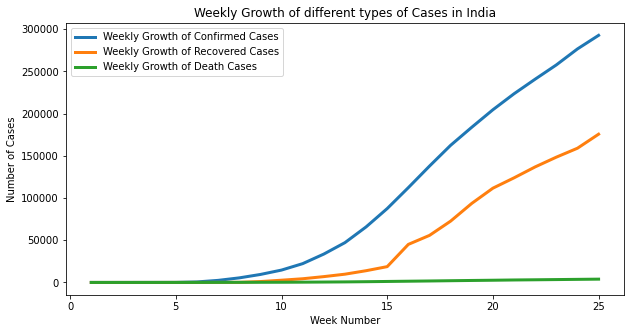

In [186]:
datewise_india["WeekOfYear"]=datewise_india.index.weekofyear

week_num_india=[]
india_weekwise_confirmed=[]
india_weekwise_recovered=[]
india_weekwise_deaths=[]
w=1
for i in list(datewise_india["WeekOfYear"].unique()):
    india_weekwise_confirmed.append(datewise_india[datewise_india["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekOfYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
    
plt.figure(figsize=(10,5))
plt.plot(week_num_india,india_weekwise_confirmed,linewidth=3,label="Weekly Growth of Confirmed Cases")
plt.plot(week_num_india,india_weekwise_recovered,linewidth=3,label="Weekly Growth of Recovered Cases")
plt.plot(week_num_india,india_weekwise_deaths,linewidth=3,label="Weekly Growth of Death Cases")
plt.xlabel('Week Number')
plt.ylabel("Number of Cases")
plt.title("Weekly Growth of different types of Cases in India")
plt.legend()

Text(0.5, 1.0, "India's Weekwise increase in Number of Death Cases")

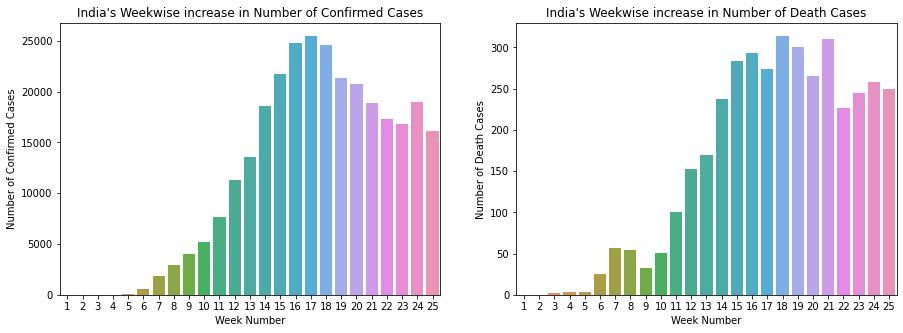

In [187]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num_india,y=pd.Series(india_weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("India's Weekwise increase in Number of Confirmed Cases")
ax2.set_title("India's Weekwise increase in Number of Death Cases")

It took 205 days in Italy to reach number of Confirmed Cases equivalent to India
It took 73 days in USA to reach number of Confirmed Cases equivalent to India
It took 184 days in Spain to reach number of Confirmed Cases equivalent to India
It took 168 days in India to reach 292625.0 Confirmed Cases


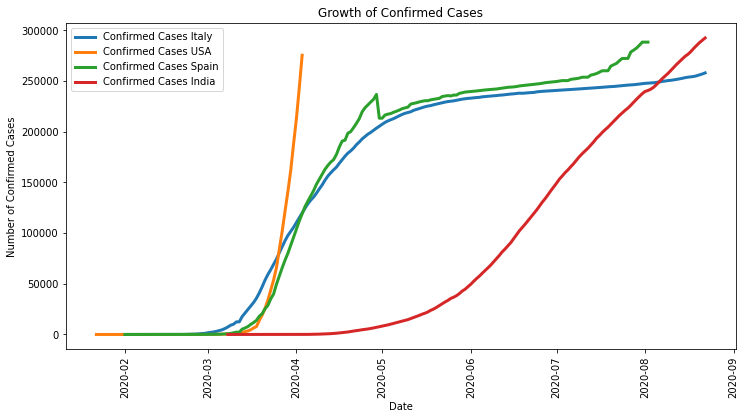

In [188]:
max_ind=datewise_india["Confirmed"].max()
plt.figure(figsize=(12,6))
plt.plot(datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases Italy",linewidth=3)
plt.plot(datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases USA",linewidth=3)
plt.plot(datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases Spain",linewidth=3)
plt.plot(datewise_india[datewise_india["Confirmed"]>0]["Confirmed"],label="Confirmed Cases India",linewidth=3)
plt.xlabel("Date")
plt.ylabel("Number of Confirmed Cases")
plt.title("Growth of Confirmed Cases")
plt.legend()
plt.xticks(rotation=90)

print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed Cases equivalent to India")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in USA to reach number of Confirmed Cases equivalent to India")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed Cases equivalent to India")
print("It took",datewise_india[datewise_india["Confirmed"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")

#### Comparison of Daily Increase in Number of Cases of Italy, Spain, USA and India, where maximum number of Confirmed Cases are equivalent to maximum number of Confirmed Cases in India

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669.]), <a list of 8 Text major ticklabel objects>)

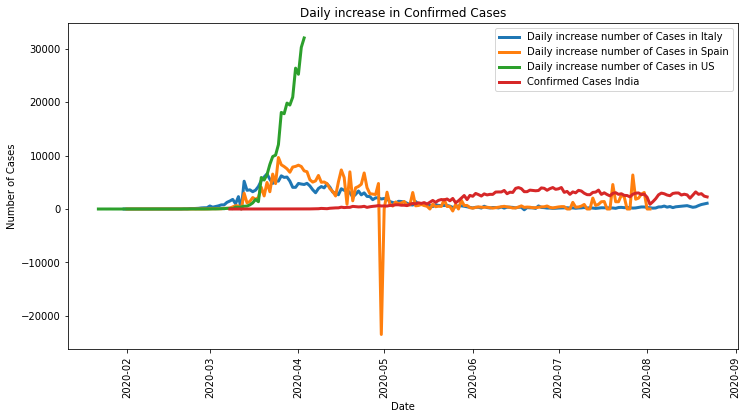

In [189]:
plt.figure(figsize=(12,6))
plt.plot(datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)]["Confirmed"].diff().fillna(0),label="Daily increase number of Cases in Italy",linewidth=3)
plt.plot(datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)]["Confirmed"].diff().fillna(0),label="Daily increase number of Cases in Spain",linewidth=3)
plt.plot(datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)]["Confirmed"].diff().fillna(0),label="Daily increase number of Cases in US",linewidth=3)
plt.plot(datewise_india[datewise_india["Confirmed"]>0]["Confirmed"].diff().fillna(0),label="Confirmed Cases India",linewidth=3)
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.title("Daily increase in Confirmed Cases")
plt.legend()
plt.xticks(rotation=90)

## Prediction using Machine Learning Models

#### Linear Regression Model for Confirm Cases Prediction

In [190]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [191]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [192]:
lin_reg=LinearRegression(normalize=True)

In [193]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [194]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [195]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  6463277.594155333


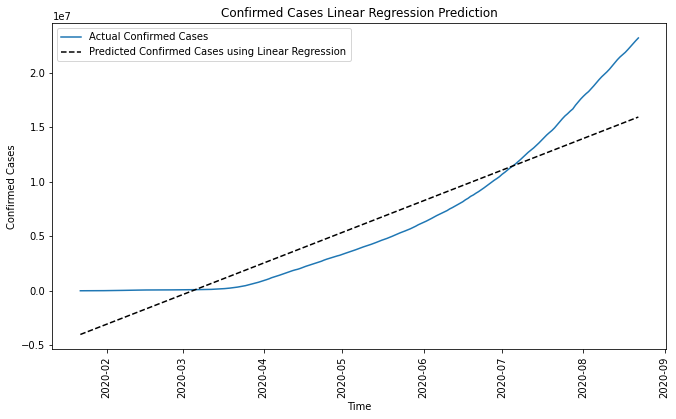

In [196]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Actual Confirmed Cases")
plt.plot(datewise.index,prediction_linreg, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

#### The Linear Regression Model is absolutely falling aprat. As it is clearly visible that the trend of Confirmed Cases in absolutely not Linear.

#### Polynomial Regression for Prediction of Confirmed Cases

In [197]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [198]:
poly = PolynomialFeatures(degree = 6) 

In [199]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [200]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [201]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  222589.39293087827


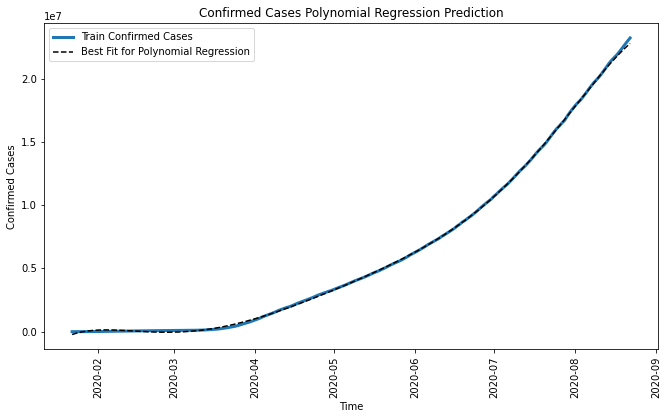

In [202]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,predictions_poly, linestyle='--',label="Best Fit for Polynomial Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Polynomial Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

In [203]:
new_prediction_poly=[]
for i in range(1,18):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

#### Support Vector Machine ModelRegressor for Prediction of Confirmed Cases 

In [204]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [205]:
#Intializing SVR Model
svm=SVR(C=1,degree=5,kernel='sigmoid',epsilon=0.001)  #rbf linear poly sigmoid

In [206]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, cache_size=200, coef0=0.0, degree=5, epsilon=0.001, gamma='scale',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [207]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [208]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  18511783.789874993


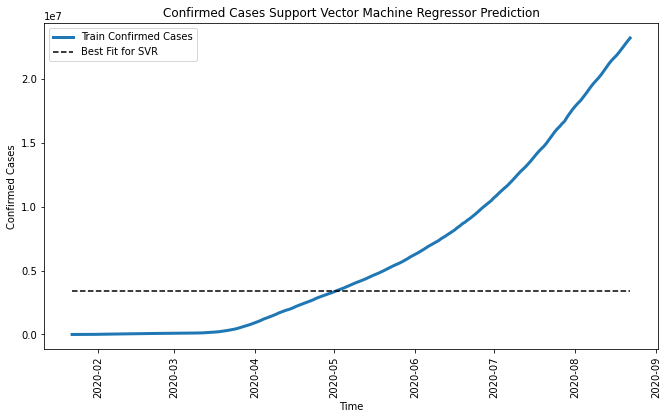

In [209]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Support Vector Machine Regressor Prediction")
plt.xticks(rotation=90)
plt.legend()

In [210]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [211]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_poly,new_prediction_svm),
                               columns=["Dates","Linear Regression Prediction","Polynonmial Regression Prediction","SVM Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction
0,2020-08-23,16040425.508072,22951575.120251,3427330.736730
1,2020-08-24,16134125.617324,23119827.241865,3427330.685027
2,2020-08-25,16227825.726577,23277869.645034,3427330.633803
3,2020-08-26,16321525.835829,23425006.176354,3427330.583051
4,2020-08-27,16415225.945081,23560516.588829,3427330.532764


Predictions of Linear Regression are nowhere close to actual values.

## Time Series Forecasting 

#### Holt's Linear Model

In [212]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]

In [213]:
holt=Holt(np.asarray(model_train["Confirmed"])).fit(smoothing_level=0.3, smoothing_slope=0.3,optimized=False)
y_pred=valid.copy()

In [214]:
y_pred["Holt"]=holt.forecast(len(valid))
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
print("Root Mean Square Error Holt's Linear Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))

Root Mean Square Error Holt's Linear Model:  49227.91633237031


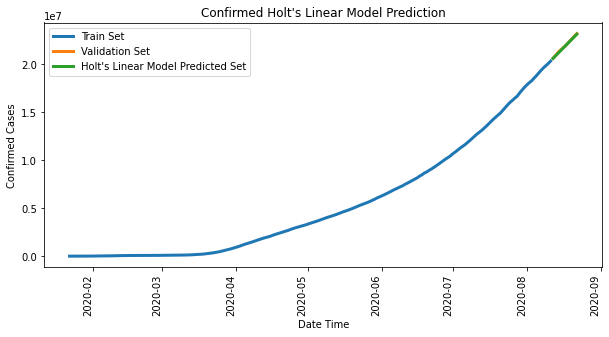

In [215]:
plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",linewidth=3)
valid.Confirmed.plot(label="Validation Set",linewidth=3)
y_pred.Holt.plot(label="Holt's Linear Model Predicted Set",linewidth=3)
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Confirmed Holt's Linear Model Prediction")
plt.xticks(rotation=90)
plt.legend()

In [216]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2020-08-23,16040425.508072,22951575.120251,3427330.736730,23396572.262229
1,2020-08-24,16134125.617324,23119827.241865,3427330.685027,23649131.790895
2,2020-08-25,16227825.726577,23277869.645034,3427330.633803,23901691.319561
3,2020-08-26,16321525.835829,23425006.176354,3427330.583051,24154250.848228
4,2020-08-27,16415225.945081,23560516.588829,3427330.532764,24406810.376894


#### Holt's Winter Model for Daily Time Series

In [217]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [218]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),seasonal_periods=12,trend='mul', seasonal='add').fit()

In [219]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))

In [220]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
print("Root Mean Square Error for Holt's Winter Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))

Root Mean Square Error for Holt's Winter Model:  64940.13374705233


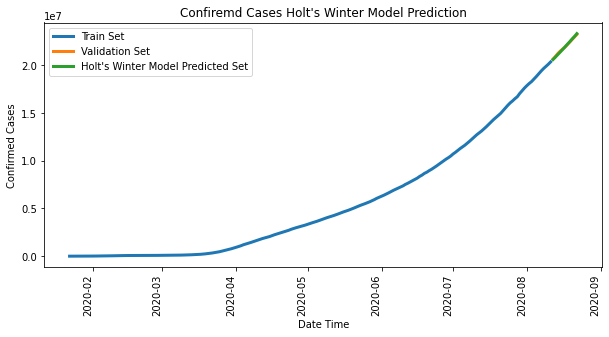

In [221]:
plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",linewidth=3)
valid.Confirmed.plot(label="Validation Set",linewidth=3)
y_pred["Holt\'s Winter Model"].plot(label="Holt's Winter Model Predicted Set",linewidth=3)
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Confiremd Cases Holt's Winter Model Prediction")
plt.xticks(rotation=90)
plt.legend()

In [222]:
holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2020-08-23,16040425.508072,22951575.120251,3427330.736730,23396572.262229,23583922.810847
1,2020-08-24,16134125.617324,23119827.241865,3427330.685027,23649131.790895,23862854.826371
2,2020-08-25,16227825.726577,23277869.645034,3427330.633803,23901691.319561,24145418.138705
3,2020-08-26,16321525.835829,23425006.176354,3427330.583051,24154250.848228,24441111.839546
4,2020-08-27,16415225.945081,23560516.588829,3427330.532764,24406810.376894,24735973.091852


In [223]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

### AR Model (using AUTO ARIMA)

In [224]:
model_ar= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=5,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Confirmed"])

Fit ARIMA: order=(0, 2, 0); AIC=4530.084, BIC=4536.691, Fit time=0.007 seconds
Fit ARIMA: order=(1, 2, 0); AIC=4506.881, BIC=4516.791, Fit time=0.112 seconds
Fit ARIMA: order=(2, 2, 0); AIC=4507.388, BIC=4520.602, Fit time=0.031 seconds
Fit ARIMA: order=(3, 2, 0); AIC=4482.495, BIC=4499.012, Fit time=0.061 seconds
Fit ARIMA: order=(4, 2, 0); AIC=4443.424, BIC=4463.244, Fit time=0.184 seconds
Fit ARIMA: order=(5, 2, 0); AIC=4386.695, BIC=4409.818, Fit time=0.309 seconds
Total fit time: 0.713 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(5, 2, 0),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [225]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

In [226]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))

Root Mean Square Error for AR Model:  74234.72979965298


(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669.]), <a list of 8 Text major ticklabel objects>)

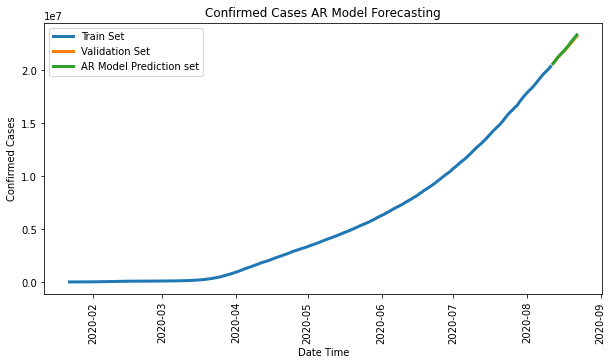

In [227]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",linewidth=3)
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",linewidth=3)
plt.plot(y_pred["AR Model Prediction"],label="AR Model Prediction set",linewidth=3)
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases AR Model Forecasting")
plt.xticks(rotation=90)

In [228]:
AR_model_new_prediction=[]
for i in range(1,18):
    AR_model_new_prediction.append(model_ar.predict(len(valid)+i)[-1])
model_predictions["AR Model Prediction"]=AR_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction
0,2020-08-23,16040425.508072,22951575.120251,3427330.736730,23396572.262229,23583922.810847,23597974.408515
1,2020-08-24,16134125.617324,23119827.241865,3427330.685027,23649131.790895,23862854.826371,23861562.853586
2,2020-08-25,16227825.726577,23277869.645034,3427330.633803,23901691.319561,24145418.138705,24138853.417118
3,2020-08-26,16321525.835829,23425006.176354,3427330.583051,24154250.848228,24441111.839546,24428930.917012
4,2020-08-27,16415225.945081,23560516.588829,3427330.532764,24406810.376894,24735973.091852,24723328.253945


### MA Model (using AUTO ARIMA)

In [229]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [230]:
model_ma= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma.fit(model_train["Confirmed"])

Fit ARIMA: order=(0, 2, 0); AIC=4530.084, BIC=4536.691, Fit time=0.006 seconds
Fit ARIMA: order=(0, 2, 1); AIC=4495.449, BIC=4505.359, Fit time=0.028 seconds
Fit ARIMA: order=(0, 2, 2); AIC=4487.107, BIC=4500.320, Fit time=0.059 seconds
Fit ARIMA: order=(0, 2, 3); AIC=4463.662, BIC=4480.179, Fit time=0.264 seconds
Total fit time: 0.363 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 2, 3),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [231]:
prediction_ma=model_ma.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma

In [232]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))
print("Root Mean Square Error for MA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))

Root Mean Square Error for MA Model:  59542.64781282726


(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669.]), <a list of 8 Text major ticklabel objects>)

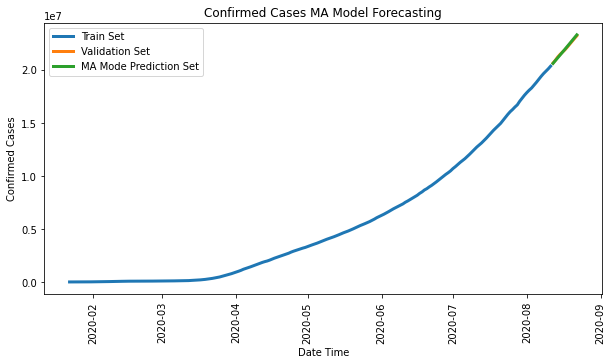

In [233]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",linewidth=3)
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",linewidth=3)
plt.plot(y_pred["MA Model Prediction"],label="MA Mode Prediction Set",linewidth=3)
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases MA Model Forecasting")
plt.xticks(rotation=90)

In [234]:
MA_model_new_prediction=[]
for i in range(1,18):
    MA_model_new_prediction.append(model_ma.predict(len(valid)+i)[-1])
model_predictions["MA Model Prediction"]=MA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction
0,2020-08-23,16040425.508072,22951575.120251,3427330.736730,23396572.262229,23583922.810847,23597974.408515,23568206.773178
1,2020-08-24,16134125.617324,23119827.241865,3427330.685027,23649131.790895,23862854.826371,23861562.853586,23845053.363399
2,2020-08-25,16227825.726577,23277869.645034,3427330.633803,23901691.319561,24145418.138705,24138853.417118,24123217.934031
3,2020-08-26,16321525.835829,23425006.176354,3427330.583051,24154250.848228,24441111.839546,24428930.917012,24402700.485074
4,2020-08-27,16415225.945081,23560516.588829,3427330.532764,24406810.376894,24735973.091852,24723328.253945,24683501.016527


### ARIMA Model (using AUTOARIMA)

In [235]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [236]:
model_arima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=4,max_q=4,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Confirmed"])

Fit ARIMA: order=(1, 2, 1); AIC=4483.267, BIC=4496.481, Fit time=0.084 seconds
Fit ARIMA: order=(1, 2, 2); AIC=4485.236, BIC=4501.753, Fit time=0.126 seconds
Fit ARIMA: order=(1, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 2, 4); AIC=4436.087, BIC=4459.210, Fit time=0.294 seconds
Fit ARIMA: order=(2, 2, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 2); AIC=4442.788, BIC=4462.608, Fit time=0.236 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 2, 4); AIC=4362.609, BIC=4389.035, Fit time=0.765 seconds
Fit ARIMA: order=(3, 2, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 2, 3); AIC=4372.004, BIC=4398.431, Fit time=0.627 seconds
Fit ARIMA: order=(3, 2, 4); AIC=4366.190, BIC=4395.919, Fit time=1.190 seconds
Fit ARIMA: order=(4, 2, 1); AIC=4407.323, BIC=4430.446, Fit time=0.283 seconds
Fit ARIMA: order=(4, 2, 2); AIC=n

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 4),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [237]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [238]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))

Root Mean Square Error for ARIMA Model:  113560.36922392267


(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669.]), <a list of 8 Text major ticklabel objects>)

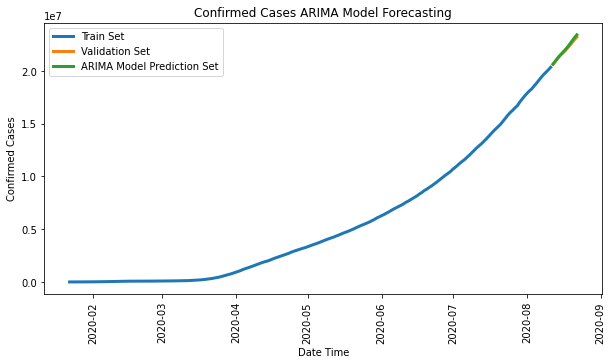

In [239]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",linewidth=3)
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",linewidth=3)
plt.plot(y_pred["ARIMA Model Prediction"],label="ARIMA Model Prediction Set",linewidth=3)
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases ARIMA Model Forecasting")
plt.xticks(rotation=90)

In [240]:
ARIMA_model_new_prediction=[]
for i in range(1,18):
    ARIMA_model_new_prediction.append(model_arima.predict(len(valid)+i)[-1])
model_predictions["ARIMA Model Prediction"]=ARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction
0,2020-08-23,16040425.508072,22951575.120251,3427330.736730,23396572.262229,23583922.810847,23597974.408515,23568206.773178,23660611.863258
1,2020-08-24,16134125.617324,23119827.241865,3427330.685027,23649131.790895,23862854.826371,23861562.853586,23845053.363399,23909978.108655
2,2020-08-25,16227825.726577,23277869.645034,3427330.633803,23901691.319561,24145418.138705,24138853.417118,24123217.934031,24184614.813642
3,2020-08-26,16321525.835829,23425006.176354,3427330.583051,24154250.848228,24441111.839546,24428930.917012,24402700.485074,24490549.413203
4,2020-08-27,16415225.945081,23560516.588829,3427330.532764,24406810.376894,24735973.091852,24723328.253945,24683501.016527,24811036.938694


### SARIMA Model (using AUTO ARIMA)

In [241]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=3,max_q=3,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Fit ARIMA: order=(0, 2, 0) seasonal_order=(1, 0, 1, 7); AIC=4517.985, BIC=4531.198, Fit time=0.148 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(0, 0, 0, 7); AIC=4530.084, BIC=4536.691, Fit time=0.017 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(1, 0, 0, 7); AIC=4440.755, BIC=4453.968, Fit time=0.136 seconds
Fit ARIMA: order=(0, 2, 1) seasonal_order=(0, 0, 1, 7); AIC=4467.689, BIC=4480.902, Fit time=0.156 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(0, 0, 0, 7); AIC=4506.762, BIC=4516.672, Fit time=0.031 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(2, 0, 0, 7); AIC=4433.539, BIC=4450.056, Fit time=0.313 seconds
Fit ARIMA: order=(1, 2, 0) seasonal_order=(2, 0, 1, 7); AIC=4434.529, BIC=4454.349, Fit time=0.587 seconds
Fit ARIMA: order=(0, 2, 0) seasonal_order=(2, 0, 0, 7); AIC=4511.012, BIC=4524.225, Fit time=0.146 seconds
Fit ARIMA: order=(2, 2, 0) seasonal_order=(2, 0, 0, 7); AIC=4430.690, BIC=4450.509, Fit time=0.406 seconds
Fit ARIMA: order=(2, 2, 1) seasonal_o

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 0, 2, 7), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend='c')

In [242]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [243]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
print("Root Mean Square Error for SARIMA Model: ",np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))

Root Mean Square Error for SARIMA Model:  149104.66339779596


(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669.]), <a list of 8 Text major ticklabel objects>)

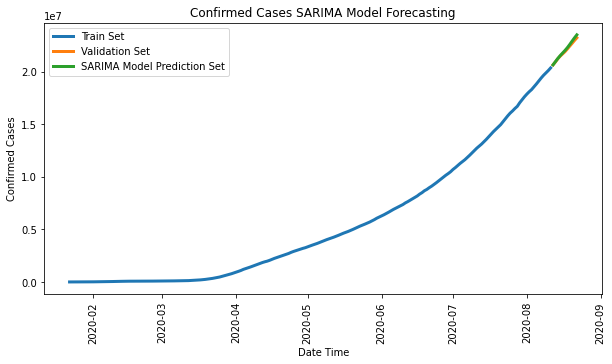

In [244]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",linewidth=3)
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",linewidth=3)
plt.plot(y_pred["SARIMA Model Prediction"],label="SARIMA Model Prediction Set",linewidth=3)
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases SARIMA Model Forecasting")
plt.xticks(rotation=90)

In [245]:
SARIMA_model_new_prediction=[]
for i in range(1,18):
    SARIMA_model_new_prediction.append(model_sarima.predict(len(valid)+i)[-1])
model_predictions["SARIMA Model Prediction"]=SARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction
0,2020-08-23,16040425.508072,22951575.120251,3427330.736730,23396572.262229,23583922.810847,23597974.408515,23568206.773178,23660611.863258,23746180.667827
1,2020-08-24,16134125.617324,23119827.241865,3427330.685027,23649131.790895,23862854.826371,23861562.853586,23845053.363399,23909978.108655,24005739.899479
2,2020-08-25,16227825.726577,23277869.645034,3427330.633803,23901691.319561,24145418.138705,24138853.417118,24123217.934031,24184614.813642,24286268.502705
3,2020-08-26,16321525.835829,23425006.176354,3427330.583051,24154250.848228,24441111.839546,24428930.917012,24402700.485074,24490549.413203,24602633.985412
4,2020-08-27,16415225.945081,23560516.588829,3427330.532764,24406810.376894,24735973.091852,24723328.253945,24683501.016527,24811036.938694,24936943.172254


### Facebook's Prophet Model for forecasting 

In [246]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(datewise.index),list(datewise["Confirmed"])),columns=['ds','y'])

In [247]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [248]:
forecast_c=prophet_c.make_future_dataframe(periods=17)
forecast_confirmed=forecast_c.copy()

In [249]:
confirmed_forecast=prophet_c.predict(forecast_c)
#print(confirmed_forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']])

In [250]:
model_scores.append(np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))
print("Root Mean Squared Error for Prophet Model: ",np.sqrt(mean_squared_error(datewise["Confirmed"],confirmed_forecast['yhat'].head(datewise.shape[0]))))

Root Mean Squared Error for Prophet Model:  33785.55042632996


Figure(720x432)


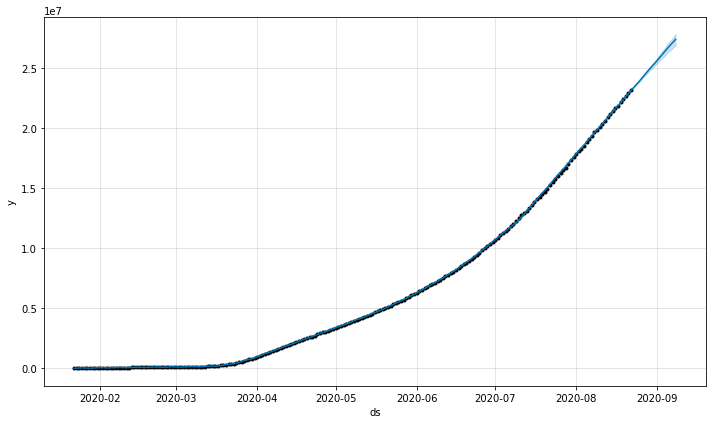

In [251]:
print(prophet_c.plot(confirmed_forecast))

Figure(648x432)


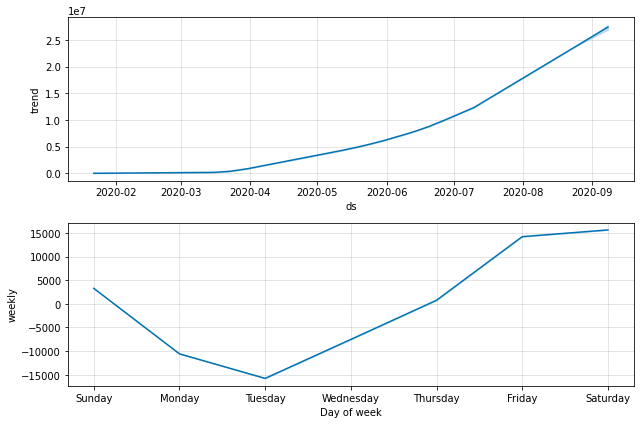

In [252]:
print(prophet_c.plot_components(confirmed_forecast))

#### Summarization of Forecasts using different Models

In [253]:
model_names=["Linear Regression","Polynomial Regression","Support Vector Machine Regressor","Holt's Linear","Holt's Winter Model",
            "Auto Regressive Model (AR)","Moving Average Model (MA)","ARIMA Model","SARIMA Model","Facebook's Prophet Model"]
model_summary=pd.DataFrame(zip(model_names,model_scores),columns=["Model Name","Root Mean Squared Error"]).sort_values(["Root Mean Squared Error"])
model_summary

,Model Name,Root Mean Squared Error
9,Facebook's Prophet Model,33785.550426
3,Holt's Linear,49227.916332
6,Moving Average Model (MA),59542.647813
4,Holt's Winter Model,64940.133747
5,Auto Regressive Model (AR),74234.729800
7,ARIMA Model,113560.369224
8,SARIMA Model,149104.663398
1,Polynomial Regression,222589.392931
0,Linear Regression,6463277.594155
2,Support Vector Machine Regressor,18511783.789875


In [254]:
model_predictions["Prophet's Prediction"]=list(confirmed_forecast["yhat"].tail(17))
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(17))
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction,Prophet's Prediction,Prophet's Upper Bound
0,2020-08-23,16040425.508072,22951575.120251,3427330.736730,23396572.262229,23583922.810847,23597974.408515,23568206.773178,23660611.863258,23746180.667827,23387021.008945,23450060.621634
1,2020-08-24,16134125.617324,23119827.241865,3427330.685027,23649131.790895,23862854.826371,23861562.853586,23845053.363399,23909978.108655,24005739.899479,23624804.697385,23689253.221710
2,2020-08-25,16227825.726577,23277869.645034,3427330.633803,23901691.319561,24145418.138705,24138853.417118,24123217.934031,24184614.813642,24286268.502705,23871248.886011,23945826.231832
3,2020-08-26,16321525.835829,23425006.176354,3427330.583051,24154250.848228,24441111.839546,24428930.917012,24402700.485074,24490549.413203,24602633.985412,24131114.054037,24212412.512540
4,2020-08-27,16415225.945081,23560516.588829,3427330.532764,24406810.376894,24735973.091852,24723328.253945,24683501.016527,24811036.938694,24936943.172254,24391022.987791,24482872.509217


### Time Series Forecasting for Death Cases

(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669.]), <a list of 8 Text major ticklabel objects>)

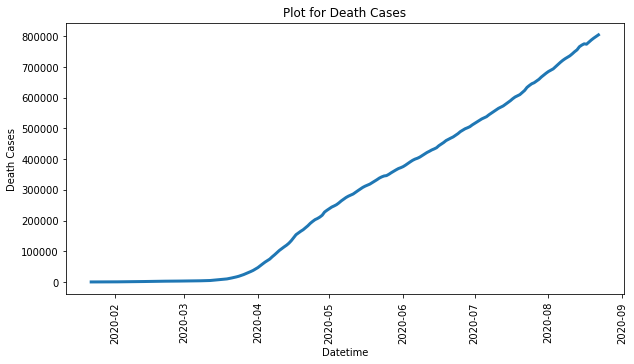

In [255]:
plt.figure(figsize=(10,5))
plt.plot(datewise["Deaths"],linewidth=3)
plt.ylabel("Death Cases")
plt.xlabel("Datetime")
plt.title("Plot for Death Cases")
plt.xticks(rotation=90)

In [256]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [257]:
model_arima_deaths=auto_arima(model_train["Deaths"],trace=True, error_action='ignore', start_p=0,start_q=0,
                              max_p=2,max_q=2,suppress_warnings=True,stepwise=False,seasonal=False)     
model_arima_deaths.fit(model_train["Deaths"])

Fit ARIMA: order=(0, 2, 0); AIC=3393.556, BIC=3400.162, Fit time=0.009 seconds
Fit ARIMA: order=(0, 2, 1); AIC=3392.352, BIC=3402.262, Fit time=0.034 seconds
Fit ARIMA: order=(0, 2, 2); AIC=3366.142, BIC=3379.355, Fit time=0.099 seconds
Fit ARIMA: order=(1, 2, 0); AIC=3393.273, BIC=3403.183, Fit time=0.059 seconds
Fit ARIMA: order=(1, 2, 1); AIC=3364.919, BIC=3378.132, Fit time=0.198 seconds
Fit ARIMA: order=(1, 2, 2); AIC=3363.239, BIC=3379.756, Fit time=0.120 seconds
Fit ARIMA: order=(2, 2, 0); AIC=3393.756, BIC=3406.969, Fit time=0.066 seconds
Fit ARIMA: order=(2, 2, 1); AIC=3357.209, BIC=3373.726, Fit time=0.221 seconds
Fit ARIMA: order=(2, 2, 2); AIC=3307.769, BIC=3327.589, Fit time=0.363 seconds
Total fit time: 1.180 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [258]:
predictions_deaths=model_arima_deaths.predict(len(valid))
y_pred["ARIMA Death Prediction"]=predictions_deaths

In [259]:
print("Root Mean Square Error: ",np.sqrt(mean_squared_error(valid["Deaths"],predictions_deaths)))

Root Mean Square Error:  3937.22854895022


(array([737456., 737485., 737516., 737546., 737577., 737607., 737638.,
        737669.]), <a list of 8 Text major ticklabel objects>)

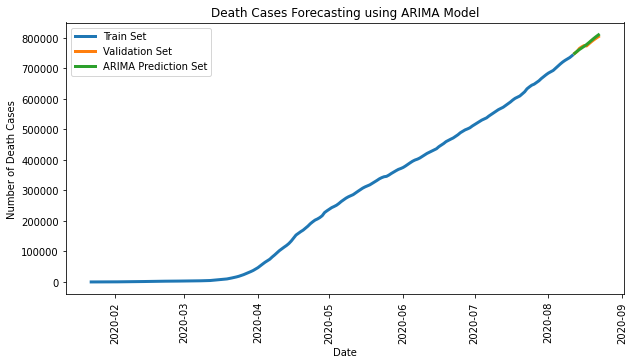

In [260]:
plt.figure(figsize=(10,5))
plt.plot(model_train["Deaths"],label="Train Set",linewidth=3)
plt.plot(valid["Deaths"],label="Validation Set",linewidth=3)
plt.plot(y_pred["ARIMA Death Prediction"],label="ARIMA Prediction Set",linewidth=3)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Number of Death Cases")
plt.title("Death Cases Forecasting using ARIMA Model")
plt.xticks(rotation=90)

In [261]:
ARIMA_model_death_forecast=[]
for i in range(1,18):
    ARIMA_model_death_forecast.append(model_arima_deaths.predict(len(valid)+i)[-1])

In [262]:
pd.DataFrame(zip(new_date,ARIMA_model_death_forecast),columns=["Deaths","ARIMA Model Death Forecast"]).head()

,Deaths,ARIMA Model Death Forecast
0,2020-08-23,816077.303414
1,2020-08-24,822164.788194
2,2020-08-25,828683.408529
3,2020-08-26,835434.548393
4,2020-08-27,842099.032314


## Conclusion

COVID-19 doesn't have very high mortatlity rate as we can see which is the most positive take away. Also the healthy Recovery Rate implies the disease is cureable. The only matter of concern is the exponential growth rate of infection. 

Countries like USA, Spain, United Kingdom,and Italy are facing some serious trouble in containing the disease showing how deadly the neglegence can lead to. The need of the hour is to perform COVID-19 pendemic controlling practices like Testing, Contact Tracing and Quarantine with a speed greater than the speed of disease spread at each country level.

![CO2%20Footprint.jpg](attachment:CO2%20Footprint.jpg)

The reason of putting this graph in the conclusion, there is an interesting pattern to observe here, Everytime there has been drop in World's Carbon emission, the world economy crashed. A one classic example is 2008 recession. I think most of you must have already guessed what's ahead, probably COVID-19 is just a big wave with a Tsunami of Recession or Depression following it. 

The growth of Confirmed and Death Cases seems to have slowed down since past few days. Which is really good sign. Hope this goes like that for a brief period. There should not be any new country emerging as the new epicenter of COVID-19 just like USA happened to be that epicenter for brief period. In case if any new country emerges as new epicenter, the Growth of Confirmed Cases will shoot up again.

### Will be updating the notebook with new Data Visualization Plot and new Prediction and Forecasting Models. Please upvote the kernel if you have liked the work. Also, any kind of suggestion and corrections would be highly appreciated!

## Stay Safe and follow basic hygiene Practices!